<a href="https://colab.research.google.com/github/NNEKUS/-data-engineering-project-template./blob/main/My_Data_Cleaning_and_Enrichment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I got some COVI-19 data from the kaggle website.
## I use the method of getting dataset directly from kaggle to colab for this initial process.

In [2]:
## first we install kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
## make a new directory - kaggle
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
##Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [16]:
##Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [17]:
## Download the dataset in this format - ! kaggle datasets download <name-of-dataset>

! kaggle datasets download meirnizri/covid19-dataset

  0% 0.00/4.66M [00:00<?, ?B/s]
100% 4.66M/4.66M [00:00<00:00, 177MB/s]


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
##Now, you need to copy the “kaggle.json” file from the mounted google drive to the current instance storage

!cp //content/kaggle.json ~/.kaggle/kaggle.json

In [20]:
## if the file is zipped, we have to unzip it

! unzip covid19-dataset

Archive:  covid19-dataset.zip
  inflating: Covid Data.csv          


In [21]:
##To get our dataframe, we need to import soem libaries

import pandas as pd
import numpy as np

In [23]:
##We can now read in our dataframe from the path on colab using the pd.read_csv('path') and we can view the first 5 lines of our dataframw using .head()

df1 = pd.read_csv('/content/Covid Data.csv')
df1.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [24]:
##we install some dependencies to help us explore our dataset

!pip install requests pandas matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import requests

In [26]:
##we start investigating our dataset

type(df1)

pandas.core.frame.DataFrame

In [27]:
##You use the Python built-in function len() to determine the number of rows

len(df1)

1048575

In [28]:
##You use the Python built-in function len() to determine the dimensionality

df1.shape

(1048575, 21)

In [29]:
##we want to see all the columns without the eclipses

pd.set_option("display.max.columns", None)

In [30]:
##a view of our complete dataframe.
df1.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [31]:
##we take a look at the columns and their data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [32]:
## to get our basic statistics about the dataset
df1.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [33]:
df1.describe(include=object)

,DATE_DIED
count,1048575
unique,401
top,9999-99-99
freq,971633


In [34]:
df1['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [35]:
df1['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [36]:
print(df1['PNEUMONIA'].value_counts())
print(df1['DIABETES'].value_counts())
print(df1['ASTHMA'].value_counts())
print(df1['OBESITY'].value_counts())
print(df1['TOBACCO'].value_counts())

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64
2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64
2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64
2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64


In [37]:
preg = df1[df1["PREGNANT"] == 1]
preg.shape

(8131, 21)

In [38]:
##explore covid infection
print(df1['CLASIFFICATION_FINAL'].value_counts())

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64


In [39]:
#find out the number of confirmed infections
covid_positive = df1[df1["CLASIFFICATION_FINAL"] <= 3]
covid_positive.shape

(391979, 21)

In [40]:
##find out the number of pregnant women that were infected with covid
preg_positive = df1[
     (df1["CLASIFFICATION_FINAL"] <= 3) &
     (df1["PREGNANT"] == 1) 
 ]
preg_positive.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,2754.000000,2754.000000,2754.0,2754.000000,2754.000000,2754.000000,2754.000000,2754.0,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000
mean,1.639434,8.901961,1.0,1.252360,73.138707,1.886347,28.706245,1.0,2.066812,2.102397,2.078068,2.198983,2.039942,2.230937,2.099129,1.980029,2.101307,2.086057,2.941176,73.127451
std,0.480252,3.738915,0.0,0.434446,41.243727,0.317447,6.384102,0.0,3.174299,3.167736,3.172268,4.478425,2.592958,5.174511,3.168356,2.604719,3.167943,3.170801,0.337977,41.263280
min,1.000000,3.000000,1.0,1.000000,1.000000,1.000000,14.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.0,1.000000,2.000000,2.000000,24.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,12.000000,1.0,1.000000,97.000000,2.000000,29.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
75%,2.000000,12.000000,1.0,2.000000,97.000000,2.000000,33.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
max,2.000000,13.000000,1.0,2.000000,99.000000,2.000000,80.000000,1.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,3.000000,99.000000


In [41]:
##since 97 and 99 are null values, we replace them with NaN

df1 = df1.replace(97, np.nan)
df1 = df1.replace('9999-99-99', np.nan)
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1,65.0,2.0,2,2,2,2,1,2,2,2,2,2,3,NaN
1,2,1,2,1,03/06/2020,NaN,1,72.0,NaN,2,2,2,2,1,2,2,1,1,2,5,NaN
2,2,1,2,2,09/06/2020,1.0,2,55.0,NaN,1,2,2,2,2,2,2,2,2,2,3,2.0
3,2,1,1,1,12/06/2020,NaN,2,53.0,2.0,2,2,2,2,2,2,2,2,2,2,7,NaN
4,2,1,2,1,21/06/2020,NaN,2,68.0,NaN,1,2,2,2,1,2,2,2,2,2,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,NaN,2,40.0,NaN,2,2,2,2,2,2,2,2,2,2,7,NaN
1048571,1,13,2,2,NaN,2.0,2,51.0,NaN,2,2,2,2,1,2,2,2,2,2,7,2.0
1048572,2,13,2,1,NaN,NaN,2,55.0,NaN,2,2,2,2,2,2,2,2,2,2,7,NaN
1048573,2,13,2,1,NaN,NaN,2,28.0,NaN,2,2,2,2,2,2,2,2,2,2,7,NaN


In [42]:
##we try to verify the occurence of null values in the dataset
df1.isnull()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1048571,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1048573,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


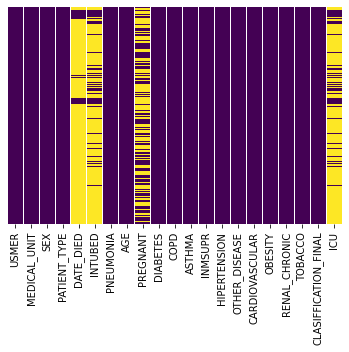

In [43]:
##visualize the extent of null values in the dataset
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We can see that the columns Date-Died, Intubed, Pregnant and ICU have quite a lot of null values hence, we cannot even clean up the data by replacing the null values with average values.
What we can do here is to eliminate those columns as information supplied is very minimal and cannot be worked with.

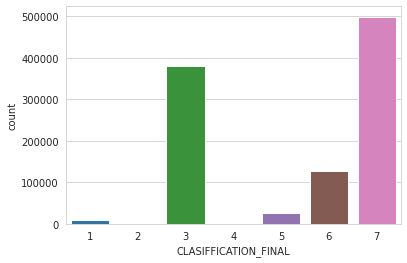

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='CLASIFFICATION_FINAL', data = df1)

From 1-3 show the patients diagnosed with covid-19 at different stages while 4-7 show the people not diagnosed with covid-19.
We can see that the larger population was not diagnosed with covid-19.

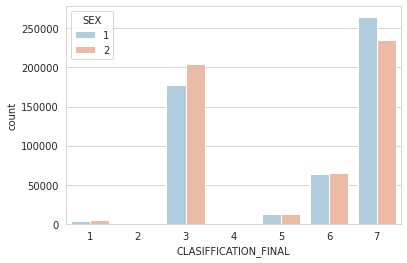

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='CLASIFFICATION_FINAL', hue = 'SEX', data = df1, palette ='RdBu_r')

More male were diagnosed with stage 3 covid-19 infection, Nobody had stage 2 infection, and the number of males with stage 1 infection was also slightly higher than the females.
Overall, more males were diagnosed with the infection ate various stages.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


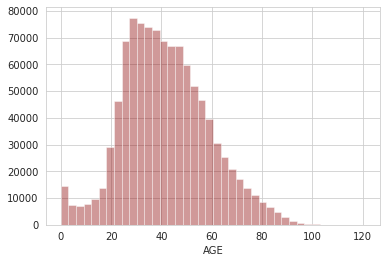

In [46]:
sns.distplot(df1['AGE'].dropna(),kde=False, color='darkred',bins=40)

In [47]:
##let's drop all the columns with plenty null values
df1 = df1.drop(['DATE_DIED', 'INTUBED', 'PREGNANT', 'ICU'], axis=1)
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,65.0,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,72.0,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,2,55.0,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,2,53.0,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,2,68.0,1,2,2,2,1,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,40.0,2,2,2,2,2,2,2,2,2,2,7
1048571,1,13,2,2,2,51.0,2,2,2,2,1,2,2,2,2,2,7
1048572,2,13,2,1,2,55.0,2,2,2,2,2,2,2,2,2,2,7
1048573,2,13,2,1,2,28.0,2,2,2,2,2,2,2,2,2,2,7


In [48]:
df1.isnull()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


There are no more null values in the dataset and we now have 17 columns instead of 21.

In [49]:
df1.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,65.0,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,72.0,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,2,55.0,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,2,53.0,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,2,68.0,1,2,2,2,1,2,2,2,2,2,3


In [50]:
df1 = df1.rename(columns = {'USMER': 'MEDICAL_UNIT', 'MEDICAL_UNIT': 'INSTITUTE', 'PATIENT_TYPE': 'IN_PATIENT', 'HIPERTENSION': 'HYPERTENSION', 'RENAL_CHRONIC': 'CHRONIC_RENAL', 'CLASIFFICATION_FINAL': 'COVID_POSITIVE'}, inplace = False)

In [51]:
df1.head()

,MEDICAL_UNIT,INSTITUTE,SEX,IN_PATIENT,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_RENAL,TOBACCO,COVID_POSITIVE
0,2,1,1,1,1,65.0,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,72.0,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,2,55.0,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,2,53.0,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,2,68.0,1,2,2,2,1,2,2,2,2,2,3


In [52]:
df1 = df1.rename(columns = {'INSTITUTE': 'INSTITUTE_TYPE', 'COVID_POSITIVE': 'INFECTION_STAGE'}, inplace = False)
df1.head()

,MEDICAL_UNIT,INSTITUTE_TYPE,SEX,IN_PATIENT,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_RENAL,TOBACCO,INFECTION_STAGE
0,2,1,1,1,1,65.0,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,72.0,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,2,55.0,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,2,53.0,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,2,68.0,1,2,2,2,1,2,2,2,2,2,3


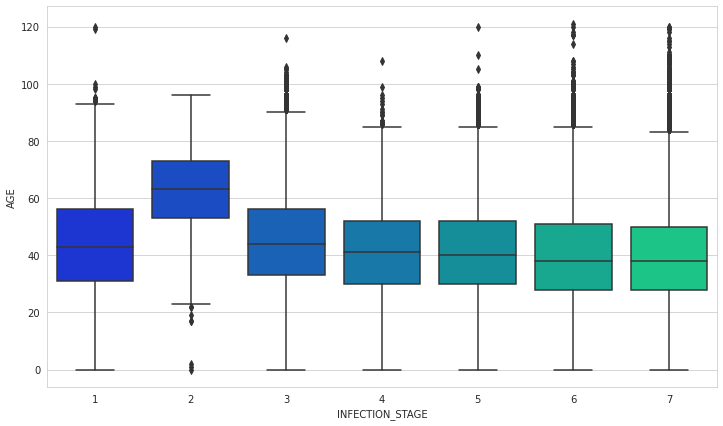

In [53]:
plt.figure(figsize=(12, 7))
sns.boxplot(x= 'INFECTION_STAGE', y= 'AGE', data=df1, palette='winter')

In [54]:
df1['AGE'].describe()

count    1.048440e+06
mean     4.178699e+01
std      1.689687e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      5.300000e+01
max      1.210000e+02
Name: AGE, dtype: float64

In [55]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from time import sleep
from random import randint

In [68]:
def get_count():
    url = "https://www.worldometers.info/coronavirus/"

    r = requests.get(url)
    html = r.text

    soup = BeautifulSoup(html)
    table = soup.find('table', {"class": "table table-bordered table-hover main_table_countries" })
    rows = table.find_all('tr')
    data = []

    for row in rows[1:]:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])

    # result = pd.DataFrame(data, columns = ['CountryOther',    'TotalCases',    'NewCases',    'TotalDeaths',    'NewDeaths',    'TotalRecovered',    'ActiveCases',    'Serious/Critical',    'TotCases/1Mpop',    'Deaths/1Mpop'])

    # Step 3: Analyze the HTML tag, where your content lives

    # Find the country list table in the webpage, using find returns the first occurence 
    my_table = soup.find('table',{'id':'main_table_countries_today'})

    # Find all table rows in the first table (i.e. the table of interest)
    table_rows = my_table.find_all('tr')

    # Since the country names are the first button in each row, find all buttons from the 
    # 1st row and return their text. 
    # we use 'td' because td is the closing html tag
    countries = [row.find('td') for row in table_rows]

    # print(countries)

    pd.options.display.max_rows
    pd.options.display.max_rows = 999
    df = pd.DataFrame()
    df['Country'] = countries
    df

    cases=[]
    for row in table_rows:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        cases.append(cols)

    # Getting attribue name 
    # find the tables 
    attribute_tag = my_table.find_all('th')
    attribute=[]
    for i in attribute_tag:
        attribute.append(i.text)

    df=pd.DataFrame(cases,columns=attribute)

    df_new=df[1:-1]

    result = df_new.fillna("Nan")

    return result


In [69]:
df_test = get_count()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 1 to 246
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    246 non-null    object
 1   Country,Other        246 non-null    object
 2   TotalCases           246 non-null    object
 3   NewCases             246 non-null    object
 4   TotalDeaths          246 non-null    object
 5   NewDeaths            246 non-null    object
 6   TotalRecovered       246 non-null    object
 7   NewRecovered         246 non-null    object
 8   ActiveCases          246 non-null    object
 9   Serious,Critical     246 non-null    object
 10  Tot Cases/1M pop     246 non-null    object
 11  Deaths/1M pop        246 non-null    object
 12  TotalTests           246 non-null    object
 13  Tests/
1M pop
       246 non-null    object
 14  Population           246 non-null    object
 15  Continent            246 non-null    object
 16  1 Caseev

In [70]:
df_test

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"122,490,682","+5,554","1,587,189",+58,"117,111,347","+5,789","3,792,146","10,032",,,,,,North America,,,,,,
2,,Asia,"210,614,961","+189,967","1,520,262",+608,"195,218,182","+139,794","13,876,517","17,353",,,,,,Asia,,,,,,
3,,Europe,"243,979,464","+5,720","1,994,625",+64,"239,004,835","+20,132","2,980,004","7,235",,,,,,Europe,,,,,,
4,,South America,"67,382,798",,"1,344,340",,"65,150,285","+9,949","888,173","10,314",,,,,,South America,,,,,,
5,,Oceania,"13,795,681",,"24,168",,"13,567,573",,"203,940",131,,,,,,Australia/Oceania,,,,,,
6,,Africa,"12,753,915",,"258,401",,"12,046,750",,"448,764",840,,,,,,Africa,,,,,,
7,,,721,,15,,706,,0,0,,,,,,,,,,,,
8,,World,"671,018,222","+201,241","6,729,000",+730,"642,099,678","+175,664","22,189,544","45,905","86,085",863.3,,,,All,,,,,,
9,1,USA,"103,482,187",,"1,125,020",,"100,265,118",,"2,092,049","4,849","309,082","3,360","1,156,831,187","3,455,236","334,805,269",North America,3,298,0,,,"6,249"
10,2,India,"44,681,884",,"530,726",,"44,147,983",,"3,175",698,"31,765",377,"912,362,106","648,615","1,406,631,776",Asia,31,"2,650",2,,,2
